## KNN Approach



### Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

from pathlib import Path
import os

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


from pyMLaux import plot_history, evaluate_classification_result,plot_2d_prediction


2024-05-06 21:50:51.641607: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-06 21:50:51.732031: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 21:50:51.732074: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 21:50:51.733887: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-06 21:50:51.751582: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# read dynamic path
base_dir = Path(os.getcwd()) / "implementation"
data_dir = base_dir / "data/source/"
result_dir = base_dir / "data/results/"

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [3]:
nn_data_raw = pd.read_csv(data_dir/"MOAB/MOAB.csv")

nn_data_raw

,INDEX,NAME,Salt_Bridge:GLU84B,Hydrophobic_Interaction:GLU84B,Halogen_Bond:GLN206B,Hydrophobic_Interaction:LEU328B,Water_Bridge:THR201B,Halogen_Bond:SER200B,Hydrophobic_Interaction:TYR435A,Hydrogen_Bond:PRO102B,...,Pi-Stacking:PHE168B,Pi-Stacking:TYR326B,Hydrogen_Bond:ASN203B,Hydrophobic_Interaction:GLN206A,Hydrophobic_Interaction:THR201B,Hydrophobic_Interaction:THR202B,Water_Bridge:GLU84B,Hydrophobic_Interaction:PRO104B,Hydrophobic_Interaction:PHE103B,LABEL
0,1,CHEMBL583128|actives_final|sdf|78,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,2,0,0,active
1,2,CHEMBL583128|actives_final|sdf|79,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,2,0,0,active
2,3,ZINC32575615|decoys_final|sdf|262,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,2,0,0,inactive
3,4,CHEMBL45069|actives_final|sdf|163,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,active
4,5,ZINC36683565|decoys_final|sdf|17,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,367,CHEMBL174289|actives_final|sdf|17,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,active
367,368,CHEMBL552680|actives_final|sdf|91,0,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,active
368,369,CHEMBL522271|actives_final|sdf|2,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,active
369,370,CHEMBL26138|actives_final|sdf|107,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,active


In [4]:
lookup = {'inactive':0,'active':1}

nn_data = {'data': np.array(nn_data_raw.iloc[:, 2:-1]),
             'target': np.array([lookup[y] for y in nn_data_raw.iloc[0:,-1]]),
             'feature_names': nn_data_raw.columns[2:-1],
             'target_names': ['inactive', 'active']}


split into train- and test-set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(nn_data['data'], nn_data['target'],
                                                    test_size=0.3, random_state=4232)



### train and apply neural network

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data['data'].shape[1], )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

2024-05-06 21:50:59.292190: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 21:50:59.544607: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 21:50:59.552322: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 21:50:59.558562: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 21:50:59.564205: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 60        
                                                                 
Total params: 60 (240.00 Byte)
Trainable params: 60 (240.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/150


2024-05-06 21:51:05.611826: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-06 21:51:08.180572: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f196c1e05e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-06 21:51:08.180630: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-05-06 21:51:08.202651: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-06 21:51:08.374988: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1715025068.845647   14931 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 - 8s - loss: 0.7281 - accuracy: 0.4734 - val_loss: 0.7268 - val_accuracy: 0.4615 - 8s/epoch - 626ms/step
Epoch 2/150
13/13 - 0s - loss: 0.7204 - accuracy: 0.5072 - val_loss: 0.7176 - val_accuracy: 0.4808 - 445ms/epoch - 34ms/step
Epoch 3/150
13/13 - 0s - loss: 0.7142 - accuracy: 0.5266 - val_loss: 0.7101 - val_accuracy: 0.5385 - 350ms/epoch - 27ms/step
Epoch 4/150
13/13 - 0s - loss: 0.7083 - accuracy: 0.5507 - val_loss: 0.7055 - val_accuracy: 0.5577 - 336ms/epoch - 26ms/step
Epoch 5/150
13/13 - 0s - loss: 0.7032 - accuracy: 0.5604 - val_loss: 0.7001 - val_accuracy: 0.5769 - 480ms/epoch - 37ms/step
Epoch 6/150
13/13 - 0s - loss: 0.6983 - accuracy: 0.5700 - val_loss: 0.6946 - val_accuracy: 0.5769 - 383ms/epoch - 29ms/step
Epoch 7/150
13/13 - 0s - loss: 0.6935 - accuracy: 0.5749 - val_loss: 0.6910 - val_accuracy: 0.5769 - 482ms/epoch - 37ms/step
Epoch 8/150
13/13 - 0s - loss: 0.6885 - accuracy: 0.5845 - val_loss: 0.6866 - val_accuracy: 0.6154 - 499ms/epoch - 38ms/step
Epoch 9/150
13

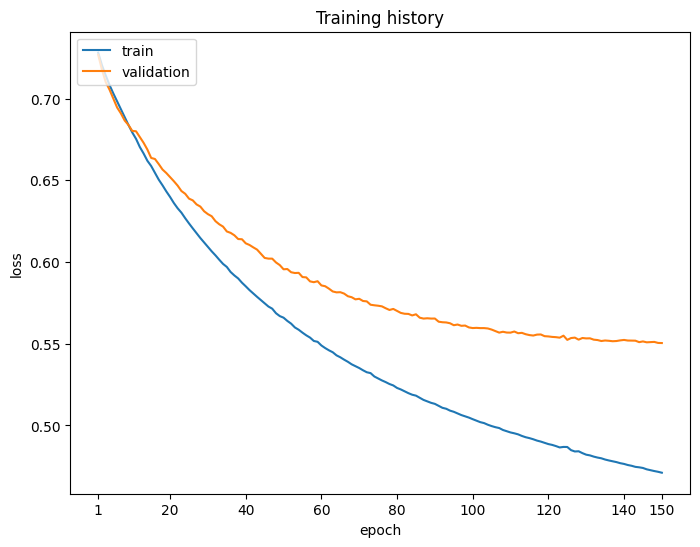

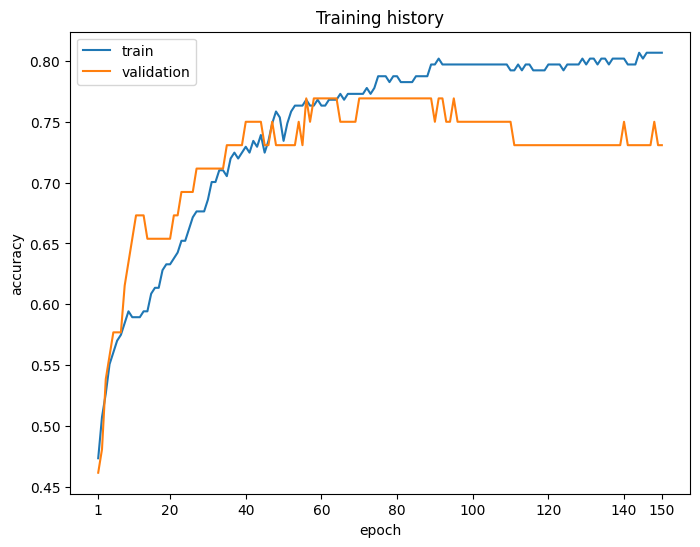

In [7]:
history = model.fit(x=X_train, y=y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

### Evaluate Testdata using model

In [8]:
pred = model.predict(X_test)
classes= [1 if i > 0.5  else 0 for i in pred]


4/4 [==============================] - 0s 4ms/step


### Prepare Data for evaluation

In [9]:
result_df = pd.DataFrame(columns=nn_data_raw.columns[:-1])
result_df = result_df.drop(columns="NAME")

for i, row in enumerate(X_test):
    data = [i]
    data.extend(row)
    result_df.loc[len(result_df["INDEX"])] = data

result_df["LABEL"] = y_test
result_df["PRED"] = classes

result_df.to_csv(result_dir / "MOAB/baseline_nn.csv", encoding="utf-8")